#Tutorial : Student Habits vs Academic Performance


Summer 2025 Data Science Project

Vichetuttama Sam

**Contributions:**

As I completed this project individually, I worked on all of the sections. This includes coming up with the project idea, dataset curation and preprocessing, data exploration and summary of statistics, ML algorithm design/development and training and test data analysis, visualization, result analysis, conclusion, and the final tutorial report creation.

**Introduction:**

The main goal of this project is to understand the factors that influence academic performance. To explore this, I analyzed a dataset containing various characteristics related to student habits, backgrounds, and exam scores.

I decided to use this dataset to explore the relationship between student habits and academic performance. As a student myself, analyzing this data felt especially meaningful. It allowed me to better understand how different behaviors and lifestyle choices might affect academic outcomes—not just in general, but potentially in my own life as well.


I focused on the following three key questions:
- Does sleeping more than 7 hours help with exam scores ?
- Is better diet quality correlated with better mental health ?
- Does parental education level affect exam scores ?

By answering these questions, I aim to understand which lifestyle and background factors impact students academic outcomes the most. The goal is to gain insights that could help students improve their performance and well-being through informed changes in daily habits or other suppport strategies.

**Data curation (part 1):**

Here is a link to the dataset found on kaggle (select all categories to be included if downloading):
https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

This dataset contains information abuot students personal habits, mental health, background characteristics, and academic performance.

Some features include:
- Background: parental_education_level,...
- Habits: hours_of_sleep, diet_quality, study_hours,...
- Mental Health: mental_health_rating,...
- Academic Performance: exam_score,...

**Data curation (part 2) + Exploratory data analysis (Checkpoint 2):**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

(5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c) organize   (e.g., set up a database or a pandas DataFrame).

In [4]:
df = pd.read_csv('student_habits_performance.csv')

new_df = df.loc[:,['student_id', 'sleep_hours', 'diet_quality',
             'parental_education_level', 'mental_health_rating',
             'exam_score']]

new_df['parental_education_level'] = new_df['parental_education_level'].fillna('None')

display(new_df.info())
display(new_df.isnull().sum())
display(new_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                1000 non-null   object 
 1   sleep_hours               1000 non-null   float64
 2   diet_quality              1000 non-null   object 
 3   parental_education_level  1000 non-null   object 
 4   mental_health_rating      1000 non-null   int64  
 5   exam_score                1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


None

,0
student_id,0
sleep_hours,0
diet_quality,0
parental_education_level,0
mental_health_rating,0
exam_score,0


,student_id,sleep_hours,diet_quality,parental_education_level,mental_health_rating,exam_score
0,S1000,8.0,Fair,Master,8,56.2
1,S1001,4.6,Good,High School,8,100.0
2,S1002,8.0,Poor,High School,1,34.3
3,S1003,9.2,Poor,Master,1,26.8
4,S1004,4.9,Fair,Master,1,66.4
...,...,...,...,...,...,...
995,S1995,7.5,Fair,High School,6,76.1
996,S1996,6.8,Poor,High School,6,65.9
997,S1997,6.5,Good,Bachelor,9,64.4
998,S1998,7.6,Fair,Bachelor,1,69.7


Hypothesis 1: Sleep time vs Exam performance

Does sleeping more than 7 hours help with exam scores ?

(t-test)

Null Hypothesis:
Students who sleep more than 7 hours per night have the same average exam score as students who sleep 7 hours or less.

Alternative Hypothesis:
Students who sleep more than 7 hours per night have a higher average exam score than students who sleep 7 hours or less.

t-stat: 3.158
one-tailed p-value: 0.00083


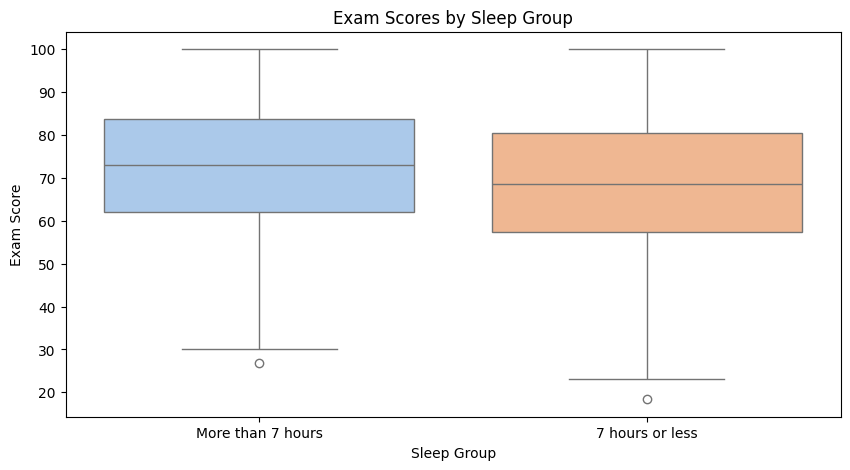

In [ ]:
new_df.loc[:,'sleep_group'] = new_df['sleep_hours'].apply(lambda x: 'More than 7 hours'
                                                    if x > 7 else '7 hours or less')
more_sleep = new_df[new_df['sleep_group'] == 'More than 7 hours']['exam_score']
less_sleep = new_df[new_df['sleep_group'] == '7 hours or less']['exam_score']

t_stat, p_two_tailed = stats.ttest_ind(more_sleep, less_sleep, equal_var=False)
p_one_tailed = p_two_tailed/2

print(f"t-stat: {t_stat:.3f}")
print(f"one-tailed p-value: {p_one_tailed:.5f}")

plt.figure(figsize=(10, 5))
sns.boxplot(x='sleep_group', y='exam_score', data=new_df, hue='sleep_group', palette='pastel')
plt.title('Exam Scores by Sleep Group')
plt.xlabel('Sleep Group')
plt.ylabel('Exam Score')
plt.show()

Conclusion 1:

Since the p-value is less than α (0.00083 < 0.05), we reject the null hypothesis (with a statistic of 3.158). This
indicates that the observed data is statistically significant, providing enough evidence to support the alternative hypothesis. So, students who sleep more than 7 hours per night usually score higher on exams than students who sleep 7 hours or less.



Hypothesis 2: Diet quality vs Mental health

Is better diet quality correlated with better mental health ?

(correlation test - pearson)

Null Hypothesis: There is no linear correlation between diet quality (Poor, Fair, Good) and mental health.

Alternative Hypothesis: There is a positive correlation between diet quality and mental health.

pearson correlation coef: 0.027
one-tailed p-value: 0.19370


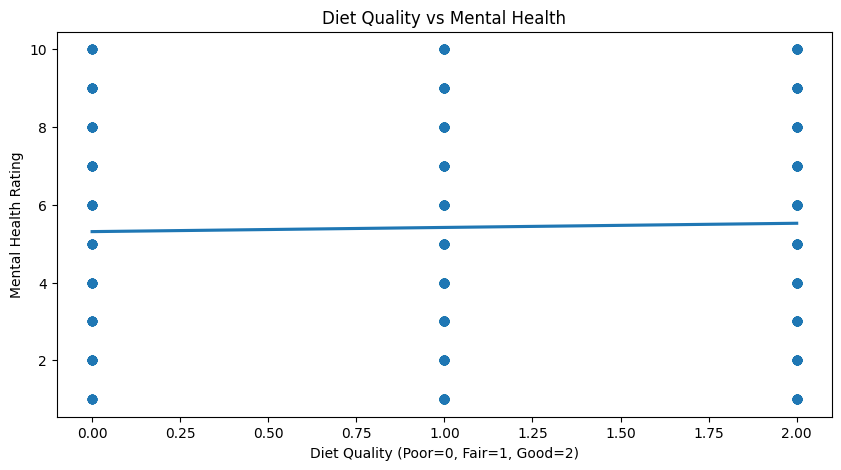

In [ ]:
diet_qual = {'Poor': 0, 'Fair': 1, 'Good': 2}
new_df.loc[:,'diet_quality_number'] = new_df['diet_quality'].map(diet_qual)

coef, p_two_tailed, = stats.pearsonr(new_df['diet_quality_number'], new_df['mental_health_rating'])
p_one_tailed = p_two_tailed/2

print(f"pearson correlation coef: {coef:.3f}")
print(f"one-tailed p-value: {p_one_tailed:.5f}")

plt.figure(figsize=(10, 5))
sns.regplot(x='diet_quality_number', y='mental_health_rating', data=new_df, ci=None, scatter_kws={'alpha':0.6})
plt.title('Diet Quality vs Mental Health')
plt.xlabel('Diet Quality (Poor=0, Fair=1, Good=2)')
plt.ylabel('Mental Health Rating')
plt.show()

Conclusion 2:
The pearson's correlation coefficient between diet quality and mental health rating is 0.027 (almost 0). This shows us that there is no linear relationship between the two. The p-value is greater than α (0.19370 > 0.05), we fail to reject the null hypothesis. Statistically, we see no evidence proving that better diet quality is correlated with better mental health for these students.

Hypothesis 3: Parental education level vs Exam scores

Does parental education level affect exam scores ?

(ANOVA test)

Null Hypothesis: The mean exam scores are the same for all parental education levels (None, High School, Bachelor, Master).

Alternative Hypothesis: At least one parental education group has a different mean exam score.

statistic: 0.653
p-value: 0.58145


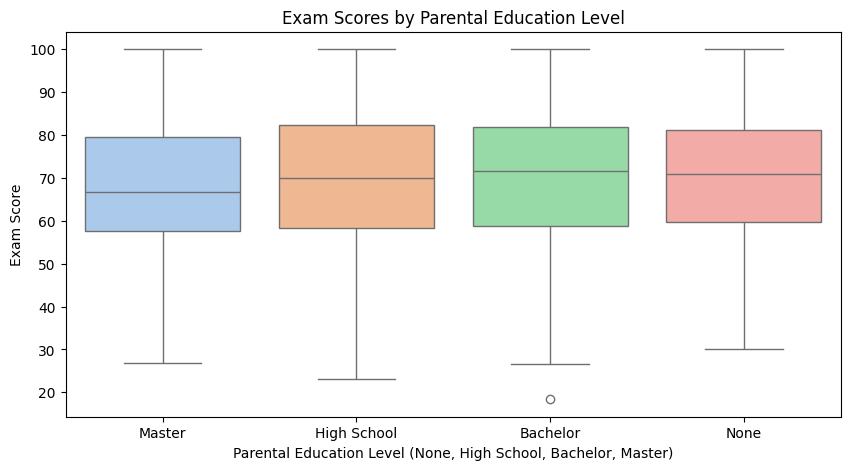

In [ ]:
levels = new_df['parental_education_level'].unique()
groups = [new_df[new_df['parental_education_level'] == level]['exam_score']
          for level in levels]

stat, p_value = stats.f_oneway(*groups)

print(f"statistic: {stat:.3f}")
print(f"p-value: {p_value:.5f}")

plt.figure(figsize=(10, 5))
sns.boxplot(x='parental_education_level', y='exam_score', hue='parental_education_level', data=new_df, palette='pastel')
plt.title('Exam Scores by Parental Education Level')
plt.xlabel('Parental Education Level (None, High School, Bachelor, Master)')
plt.ylabel('Exam Score')
plt.show()

Conclusion 3:
Since the p-value is greater than α (0.58145 > 0.05), we fail to reject the null hypothesis. Our statistic is 0.653 (very small). This means that each group means are very similar. This indicates that there is no statistically significant difference in exam scores among students from different parental education levels.

**Primary analysis:**

I think that a regression model would best suit this dataset and analysis. This specific model would allow me to evaluate how different input variables impact a continuous target variable, which is exam_scores. Regression would help us quantify the impact of multiple features on the final exam score and understand which factors carry the most importance. Specifically, a linear regression model would be used with the following features:

- sleep_hours
- study_hours_per_day
- diet_quality
- mental_health_rating
- parental_education_level

**Visualization:**

In the following, I will create a scatter plot comparing the exam scores and the predicted exam scores using the linear regression model.

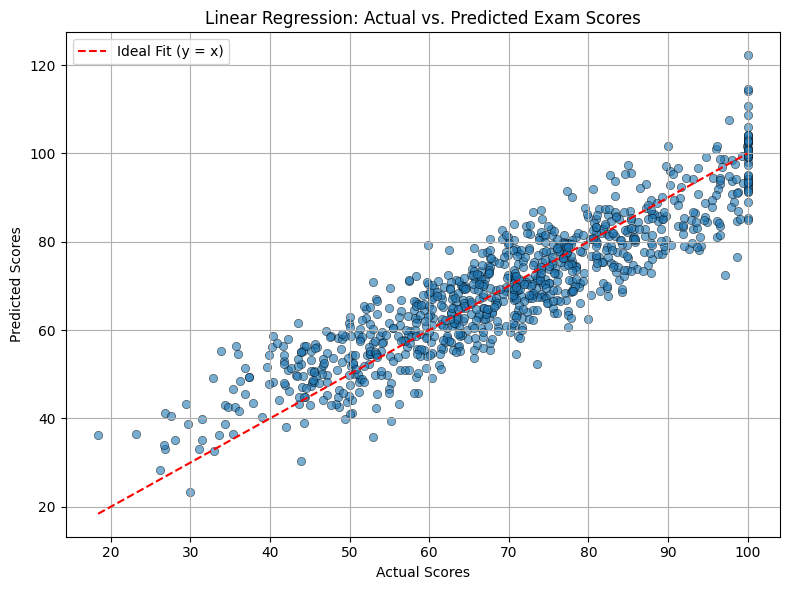

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_2 = df[['sleep_hours', 'study_hours_per_day', 'diet_quality', 'mental_health_rating', 'parental_education_level', 'exam_score']].dropna().copy()

label_enc = LabelEncoder()
df_2['diet_quality'] = label_enc.fit_transform(df_2['diet_quality'])
df_2['parental_education_level'] = label_enc.fit_transform(df_2['parental_education_level'])

X = df_2.drop(columns=['exam_score'])
y = df_2['exam_score']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit (y = x)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression: Actual vs. Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Explanation / Discussion:

In the above linear regression model plot, each blue dot represents a students data. The x axis represents the actual exam scores from the dataset and the y axis represents the predicted exam scores from the model. The red dashed line represents the ideal fit if the predictions matched the actual score, y = x.

As we can see, the dots in the scatter plot are mainly near the diagonal line. This means that the model does a reasonable good job predicting scores. However, there may be a prediction error as there are some dots that are somewhat far from the diagonal line. This may be because some factors have not been taken into account.

**Conclusion / Insights:**

This project explores how different students habits and background factors impact student academic performance with hypothesis testing and modeling.
I believe that this project gives a clear introduction of the topic to readers. In addition, I believe that this project also provides useful knowledge to readers with prior knowledge on the topic. This includes different techniques used such as t-test, correlation analysis, ANOVA, and regression modeling.

Overall, this study showed us that students who sleep more than 7 tend to perform better on exams, there is no strong evidence showing a correlation between diet quality and mental health, and parental education level does not seem to significantly influence exam scores. Moreover, these results are based on and specific to the dataset chosen and students whose information is provided. Results may be different in other datasets.